# This notebook has comparissons of the Normal and Uniform distributions
This notebook contains simulations of adding noise to the distributions and then comparing the L2 distance to
the EMD with different distance functions (L1 and L2)

In [10]:
import pandas as pd
import numpy as np
import sys
# setting path
sys.path.append('C:/Users/eriki/OneDrive/Documents/all_folder/Thesis/Thesis/utils')
# importing
from utils import *
from Visualizations import *
import time
import tqdm
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

In [20]:
res_values = [int(x) for x in np.linspace(start=100, stop=400, num=4)]
#res_values = [int(x) for x in np.linspace(start=100, stop=500, num=9)]
scale = 1
noise_values = np.logspace(start=-4, stop=1, num=31)
SNR_values = np.logspace(start=-2, stop=1, num=31)  # We want a multiplication of 3 + 1 because we start at 0

## Normal distribution

### Existing Data

In [13]:
df = pd.read_csv('csvs/results_measures_SNR_L2.csv')
res_values = df['Res'].unique()

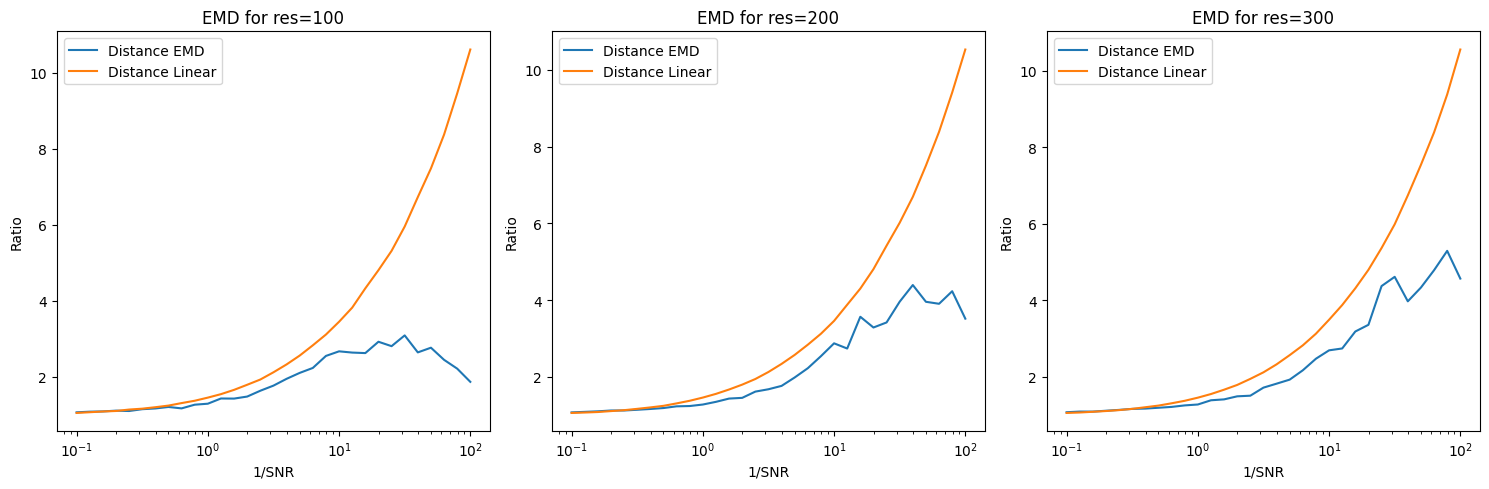

In [26]:
plt.figure(figsize=(15,5))

for i, res_option in enumerate(res_values[:3]):
    # Filter the dataframe based on current 'res' and 'scale' options
    filtered_df = df[(df['Res'] == res_option)]
    plt.subplot(1, 3, i + 1)
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_EMD'], label='Distance EMD')
    plt.plot(1/filtered_df['SNR'], 1 / filtered_df['Ratios_Linear'], label='Distance Linear')
    plt.xscale('log')
    plt.title(f'EMD for res={res_option}')
    plt.xlabel('1/SNR')
    plt.ylabel('Ratio')
    plt.legend()

plt.tight_layout()
plt.show()

### Normal distribution - distance metric L1

In [24]:
df4 = pd.DataFrame()

for res in tqdm.tqdm(res_values):
    for SNR in SNR_values:
        df4 = run_experiment_and_append_normal(df=df4, res=res, SNR=SNR, 
                                       scale_param=scale, num_samples=200, distance_metric='L1')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:48<00:00, 42.14s/it]


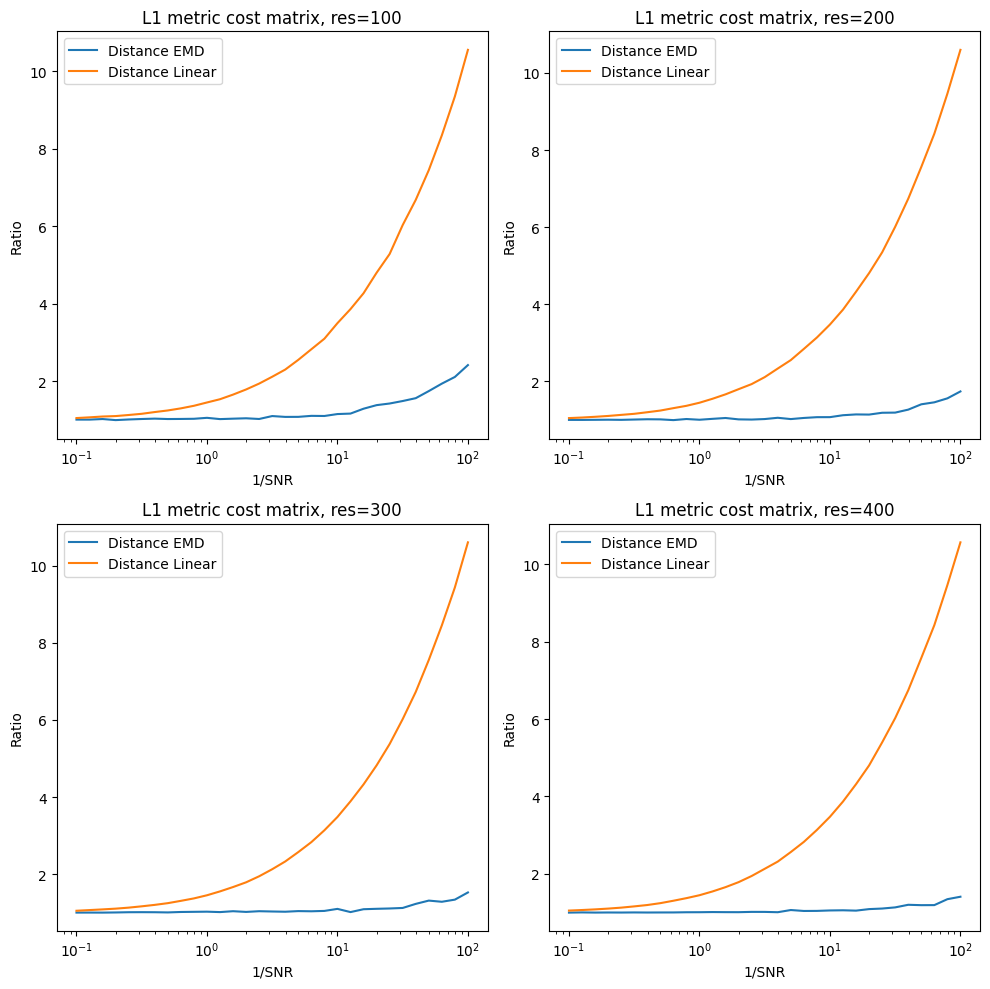

In [25]:
plt.figure(figsize=(10,10))

for i, res_option in enumerate(res_values):
    # Filter the dataframe based on current 'res' and 'scale' options
    filtered_df = df4[(df4['Res'] == res_option)]
    plt.subplot(2, 2, i + 1)
    plt.plot(1/filtered_df['SNR'], 1 / filtered_df['Ratios_EMD'], label='Distance EMD')
    plt.plot(1/filtered_df['SNR'], 1 / filtered_df['Ratios_Linear'], label='Distance Linear')
    plt.xscale('log')
    plt.title(f'L1 metric cost matrix, res={res_option}')
    plt.xlabel('1/SNR')
    plt.ylabel('Ratio')
    plt.legend()

plt.tight_layout()
plt.show()

### Normal distribution - distance metric L2

In [38]:
df3 = pd.DataFrame()

for res in tqdm.tqdm(res_values):
    for SNR in SNR_values:
        df3 = run_experiment_and_append_normal(df=df3, res=res, SNR=SNR, 
                                       scale_param=scale, num_samples=200)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [05:57<00:00, 89.36s/it]


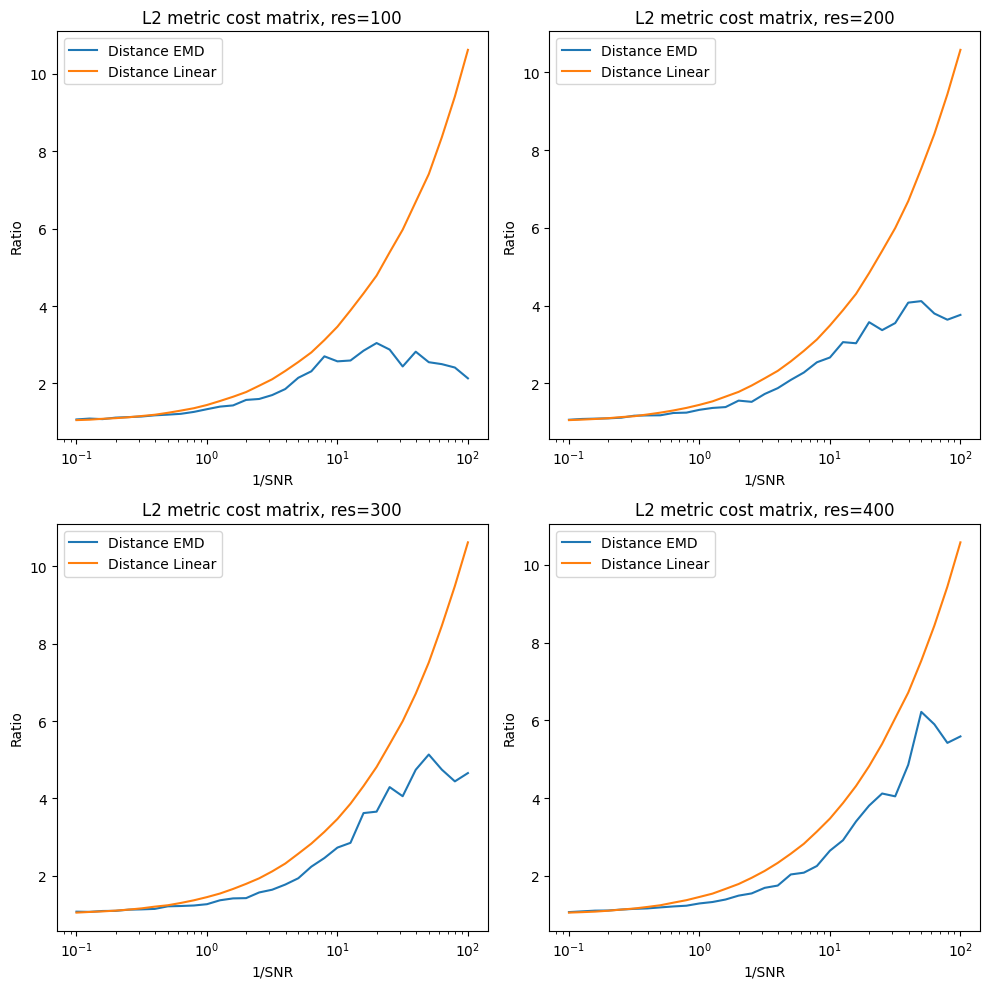

In [65]:
plt.figure(figsize=(10,10))

for i, res_option in enumerate(res_values):
    # Filter the dataframe based on current 'res' and 'scale' options
    filtered_df = df3[(df3['Res'] == res_option)]
    plt.subplot(2, 2, i + 1)
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_EMD'], label='Distance EMD')
    plt.plot(1/filtered_df['SNR'], 1 / filtered_df['Ratios_Linear'], label='Distance Linear')
    plt.xscale('log')
    plt.title(f'L2 metric cost matrix, res={res_option}')
    plt.xlabel('1/SNR')
    plt.ylabel('Ratio')
    plt.legend()

plt.tight_layout()
plt.show()

### Sanity check

In [41]:
df3_subset = df3[(df3['Res'] == res_option)]
df4_subset = df4[(df4['Res'] == res_option)]

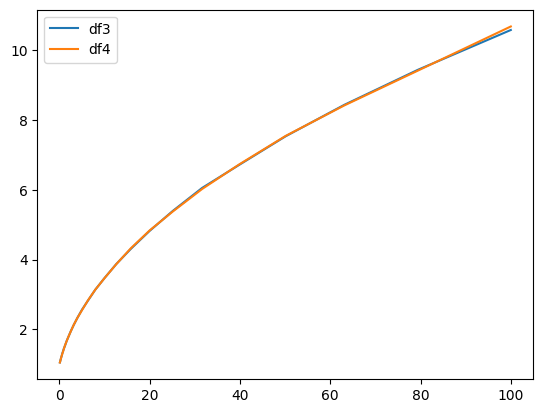

In [52]:
plt.plot(1/df3_subset['SNR'], 1 / df3_subset['Ratios_Linear'], label='df3')
plt.plot(1/df3_subset['SNR'], 1 / df4_subset['Ratios_Linear'], label='df4')

plt.legend()

## Uniform distribution:

### Single snippet of the loop for debugging

In [ ]:
#add this as a test for one run going properly
distance_metric = 'L1'
x = np.linspace(0, 1, res)

# Define the y-values for the two distributions
p = np.where(x < 0.5, 2.0, 0)
p = p/p.sum()
q = np.where(x >= 0.5, 2.0, 0)
q = q/q.sum()

C = np.zeros([res, res], dtype=np.float64)
if distance_metric == 'L1':
    dist = lambda a, b: abs(a - b)
elif distance_metric == 'L2':
    dist = lambda a, b: (a - b) ** 2
for it1 in range(res):
    for it2 in range(res):
        C[it1, it2] = dist(X[it1], X[it2])

noise_p = np.random.normal(0, noise, res)
noise_q = np.random.normal(0, noise, res)

p_noised = p + noise_p
q_noised = q + noise_q

p_pos, p_neg = split_signed_measure(p_noised)
q_pos, q_neg = split_signed_measure(q_noised)

p_post = p_pos + q_neg
q_post = p_neg + q_pos

mean_distribs = (q_post.sum() + p_post.sum()) / 2
p_post = p_post * (mean_distribs / p_post.sum())
q_post = q_post * (mean_distribs / q_post.sum())

plan_classic, results_classic_add = calc_transport_pot_emd(p, q, C)
plan_noised, results_noised_add = calc_transport_pot_emd(p_post, q_post, C)

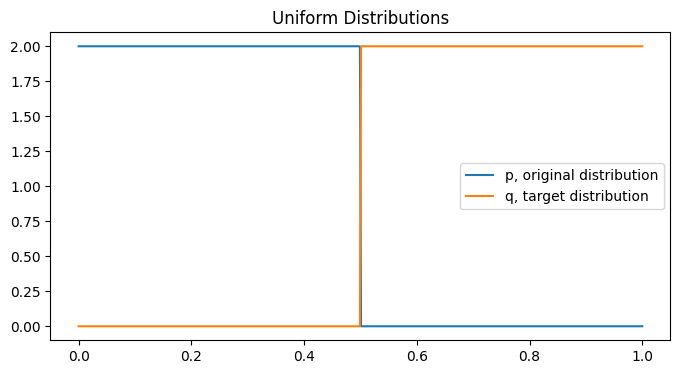

In [144]:
# Create an array of x-values from 0 to 1
x = np.linspace(0, 1, 500)

# Define the y-values for the two distributions
p = np.where(x < 0.5, 2, 0)
q = np.where(x >= 0.5, 2, 0)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, p, label='p, original distribution')
plt.plot(x, q, label='q, target distribution')

plt.title('Uniform Distributions')
plt.legend()
plt.show()

### Uniform distribution - distance metric L1

In [32]:
df1 = pd.DataFrame()

for res in tqdm.tqdm(res_values):
    for SNR in SNR_values:
        df1 = run_experiment_and_append_uni(df1, res=res, SNR=SNR, 
                                       scale_param=scale, num_samples=200, distance_metric='L1')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:45<00:00, 26.48s/it]


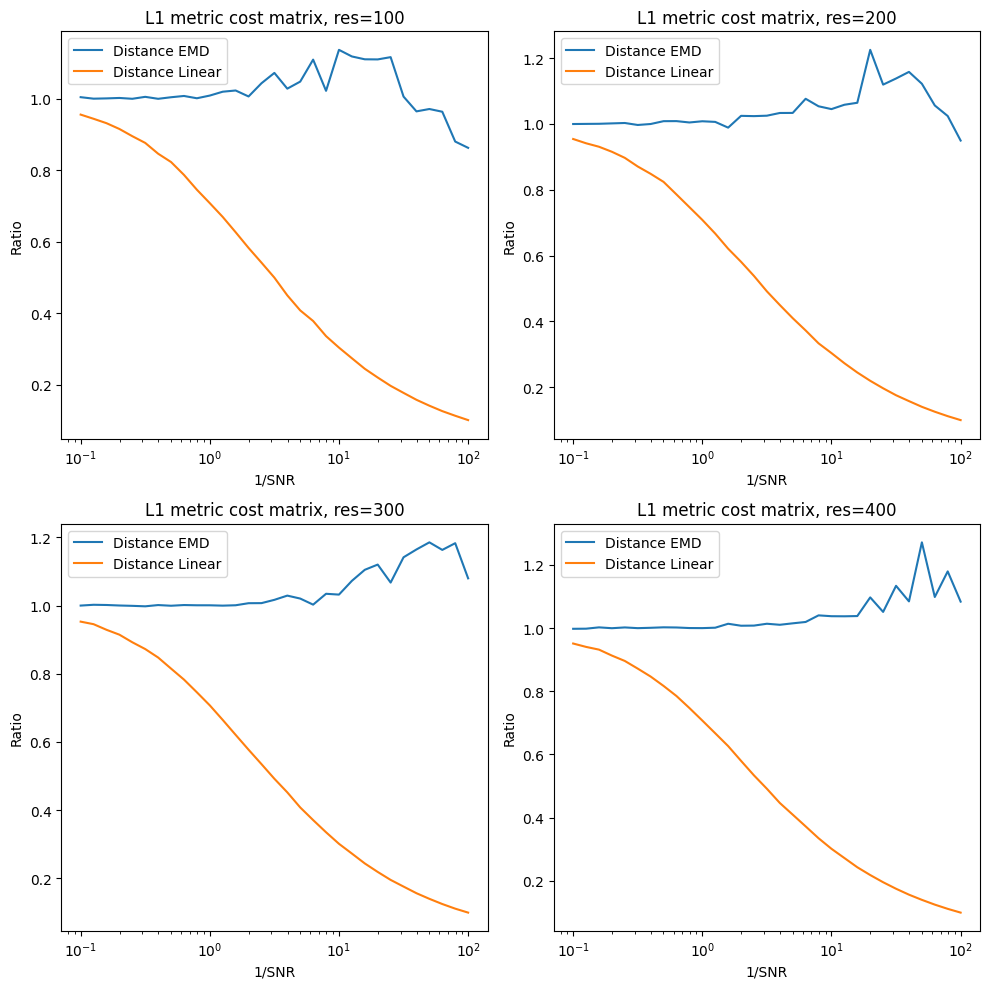

In [69]:
plt.figure(figsize=(10,10))

for i, res_option in enumerate(res_values):
    # Filter the dataframe based on current 'res' and 'scale' options
    filtered_df = df1[(df1['Res'] == res_option)]
    plt.subplot(2, 2, i + 1)
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_EMD'], label='Distance EMD')
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_Linear'], label='Distance Linear')
    plt.xscale('log')
    plt.title(f'L1 metric cost matrix, res={res_option}')
    plt.xlabel('1/SNR')
    plt.ylabel('Ratio')
    plt.legend()

plt.tight_layout()
plt.show()

### Uniform distribution - distance metric L2

In [34]:
df2 = pd.DataFrame()

for res in tqdm.tqdm(res_values):
    for SNR in SNR_values:
        df2 = run_experiment_and_append_uni(df2, res=res, SNR=SNR, 
                                            scale_param=scale, num_samples=200)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:42<00:00, 40.64s/it]


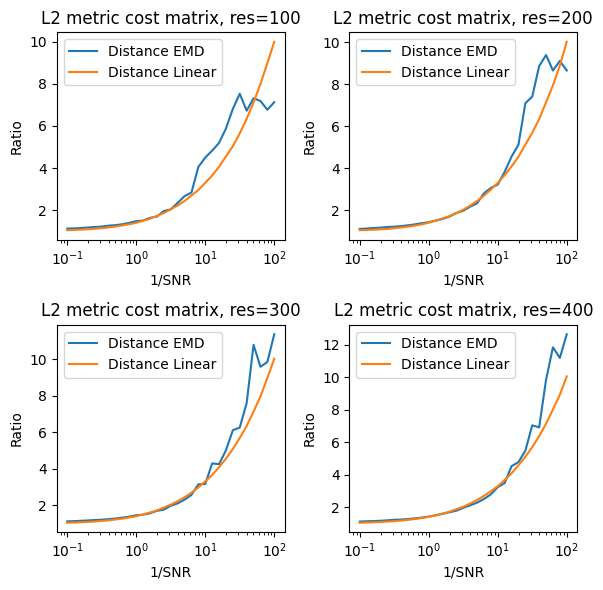

In [73]:
plt.figure(figsize=(6,6))

for i, res_option in enumerate(res_values):
    # Filter the dataframe based on current 'res' and 'scale' options
    filtered_df = df2[(df2['Res'] == res_option)]
    plt.subplot(2, 2, i + 1)
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_EMD'], label='Distance EMD')
    plt.plot(1/filtered_df['SNR'], 1 / filtered_df['Ratios_Linear'], label='Distance Linear')
    plt.xscale('log')
    plt.title(f'L2 metric cost matrix, res={res_option}')
    plt.xlabel('1/SNR')
    plt.ylabel('Ratio')
    plt.legend()

plt.tight_layout()
plt.show()

### Just a cool widget example

SelectionSlider(continuous_update=False, description='Resolution:', options=(100, 200, 300, 400), value=100)

ToggleButtons(description='Plot Type:', options=('EMD', 'Linear'), value='EMD')

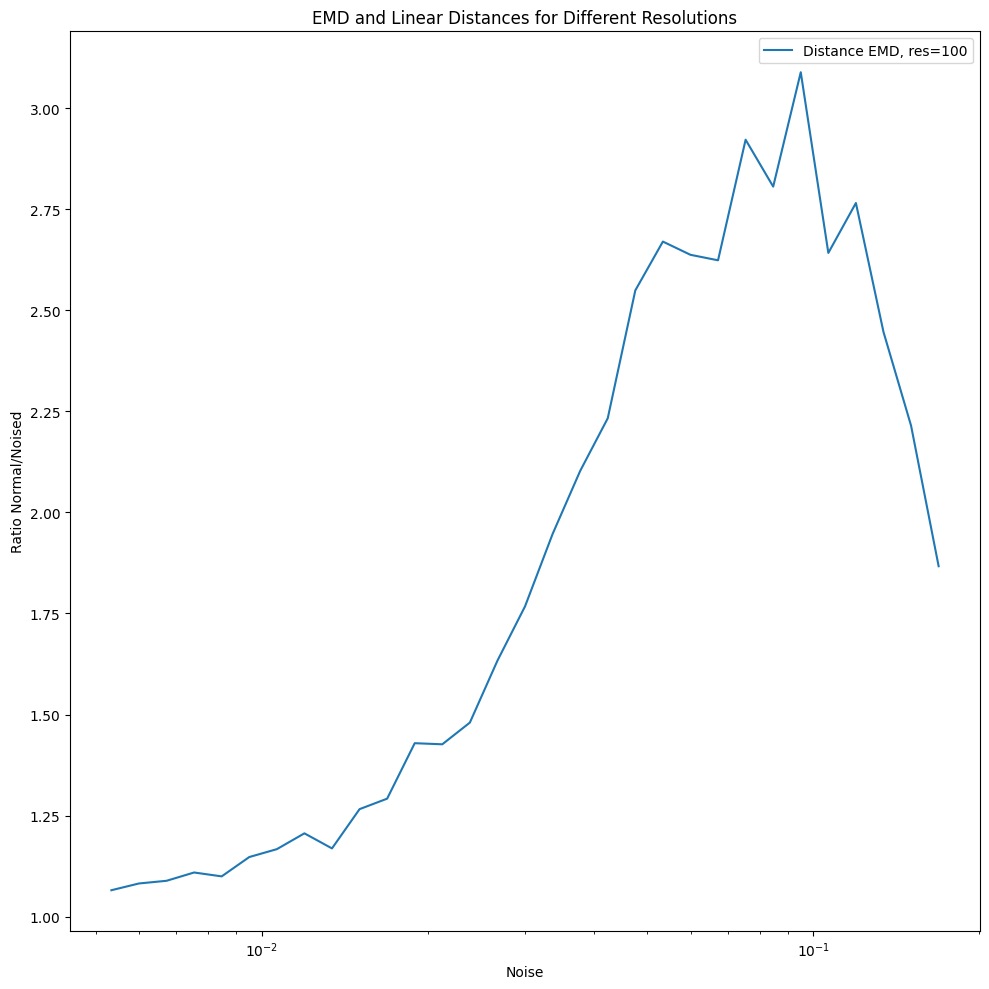

In [48]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming df and res_values are defined somewhere in your code

def update_plot(resolution, plot_type):
    plt.figure(figsize=(10, 10))
    filtered_df = df[(df['Res'] == resolution) & (df['Noise_Param'] < 1)]

    if plot_type == 'EMD':
        plt.plot(filtered_df['Noise_Param'], filtered_df['Ratios_EMD'], label=f'Distance EMD, res={resolution}')
    else:
        plt.plot(filtered_df['Noise_Param'], 1 / filtered_df['Ratios_Linear'], label=f'Distance Linear, res={resolution}')

    plt.title('EMD and Linear Distances for Different Resolutions')
    plt.xlabel('Noise')
    plt.xscale('log')
    plt.ylabel('Ratio Normal/Noised')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Widgets
res_slider = widgets.SelectionSlider(options=res_values, description='Resolution:', continuous_update=False)
plot_type_toggle = widgets.ToggleButtons(options=['EMD', 'Linear'], description='Plot Type:')

# Display Widgets
display(res_slider, plot_type_toggle)

# Update Function
def on_value_change(change):
    update_plot(res_slider.value, plot_type_toggle.value)

# Observe changes in widgets
res_slider.observe(on_value_change, names='value')
plot_type_toggle.observe(on_value_change, names='value')

# Initial plot
update_plot(res_values[0], 'EMD')